**Data Observation and Summarization**

The assignment was analyzing the effectiveness of multiple, potential cancer treatments on 250 lab mice. A trial of 45 days was used which studied nine drugs and one placebo on mice with SCC (squamons cell carcinoma).

The most promising new drug is the Capomulin. Tumors responded positively to treatment with Capomulin and tumors decreased in size by 20%.The only disadvantage was the cancer&#39;s metastatic speed which was the slowest when using Capomulin.All the mice that were administered using Capomulin experienced the highest survival rate.

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')


In [3]:
# File to Load 
#mouse_drug_data_to_load = 'C:\\Users\\joyce\\Desktop\\mousedrug_data.csv'
#clinical_trial_data_to_load = 'C:\\Users\\joyce\\Desktop\\clinicalstrial_data.csv'


In [4]:
# Read the Mouse and Drug Data and the Clinical Trial Data
clinical_df = pd.read_csv('C:\\Users\\joyce\\Desktop\\clinicalstrial_data.csv')
mouse_drag_df = pd.read_csv('C:\\Users\\joyce\\Desktop\\mousedrug_data.csv')


In [5]:
clinical_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
mouse_drag_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [7]:
# Combine the data into a single dataset
merged_data = pd.merge(clinical_df, mouse_drag_df, on='Mouse ID', how='left')
merged_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## **Tumor Response to Treatment**

In [8]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_data = merged_data.groupby(['Drug', 'Timepoint'])
mean_of_grouped_data = grouped_data['Tumor Volume (mm3)'].mean()
mean_of_grouped_data

Drug       Timepoint
Capomulin  0            45.000000
           5            44.266086
           10           43.084291
           15           42.064317
           20           40.716325
                          ...    
Zoniferol  25           55.432935
           30           57.713531
           35           60.089372
           40           62.916692
           45           65.960888
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [9]:
 #Convert to DataFrame
mean_df =pd.DataFrame(mean_of_grouped_data).reset_index()
mean_df.head(10)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [12]:
from scipy.stats import sem

# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_error = grouped_data['Tumor Volume (mm3)'].sem()
std_error
# Convert to DataFrame
std_error_df = pd.DataFrame(std_error).reset_index()


In [13]:
std_error_df.head(10)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [14]:
# Minor Data Munging to Re-Format the Data Frames
reformatted_mean_df =mean_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')

# Preview that Reformatting worked
reformatted_mean_df.head(6)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935


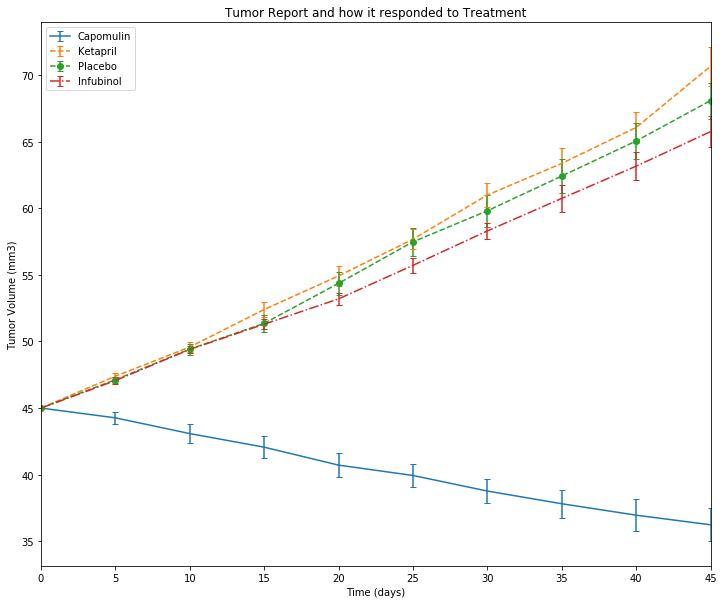

In [22]:
#Plotting the error bar
x= np.arange(0, 50, 5)
fig =plt.figure(figsize = (12,10))
#matplotlib.pyplot.errorbar(x, y, yerr=None, xerr=None, fmt='', ecolor=None, elinewidth=None, capsize=None, barsabove=False, lolims=False, uplims=False, xlolims=False, 
#xuplims=False, errorevery=1, capthick=None, *, data=None, **kwargs
plt.errorbar(x, mean_of_grouped_data.loc[["Capomulin", "Tumor Volume (mm3)"]],
             yerr = std_error.loc[["Capomulin", "Tumor Volume (mm3)"]], fmt = '', capsize = 3, label = "Capomulin")
plt.errorbar(x, mean_of_grouped_data.loc[["Ketapril", "Tumor Volume (mm3)"]],
             yerr = std_error.loc[["Ketapril", "Tumor Volume (mm3)"]], fmt = '--', capsize = 3, label = "Ketapril")
plt.errorbar(x, mean_of_grouped_data.loc[["Placebo", "Tumor Volume (mm3)"]],
             yerr = std_error.loc[["Placebo", "Tumor Volume (mm3)"]], fmt = 'o--', capsize = 3, label = "Placebo")
plt.errorbar(x, mean_of_grouped_data.loc[["Infubinol", "Tumor Volume (mm3)"]],
             yerr = std_error.loc[["Infubinol", "Tumor Volume (mm3)"]], fmt = '-.', capsize = 3, label = "Infubinol")

# Adding the legend
plt.legend(loc="upperleft")

# Adding the labels
plt.title('Tumor Report and how it responded to Treatment')
plt.xlabel('Time (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.ylim()
plt.xlim(0,45)
#Saving the figure
plt.savefig('Tumor Response.png')
plt.show()

## Metastatic Response to Treatment

In [16]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
grouped_met_data = merged_data.groupby(['Drug', 'Timepoint'])
mean_of_grouped_met_data = grouped_data['Metastatic Sites'].mean()
mean_of_grouped_met_data

Drug       Timepoint
Capomulin  0            0.000000
           5            0.160000
           10           0.320000
           15           0.375000
           20           0.652174
                          ...   
Zoniferol  25           1.687500
           30           1.933333
           35           2.285714
           40           2.785714
           45           3.071429
Name: Metastatic Sites, Length: 100, dtype: float64

In [17]:
# Convert to DataFrame
mean_met_df =pd.DataFrame(mean_of_grouped_met_data).reset_index()
mean_met_df.head(10)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


In [18]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint
std_met_error = grouped_data['Metastatic Sites'].sem()
std_met_error

Drug       Timepoint
Capomulin  0            0.000000
           5            0.074833
           10           0.125433
           15           0.132048
           20           0.161621
                          ...   
Zoniferol  25           0.236621
           30           0.248168
           35           0.285714
           40           0.299791
           45           0.286400
Name: Metastatic Sites, Length: 100, dtype: float64

In [19]:
#Convert to DataFrame
# Convert to DataFrame
std_met_df =pd.DataFrame(std_met_error).reset_index()
std_met_df.head(10)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
5,Capomulin,25,0.181818
6,Capomulin,30,0.172944
7,Capomulin,35,0.169496
8,Capomulin,40,0.175610
9,Capomulin,45,0.202591


In [20]:
# Minor Data Munging to Re-Format the Data Frames for the met_mean
reformatted_mean_met_df =mean_met_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Metastatic Sites')
# Preview that Reformatting worked
reformatted_mean_met_df.head(6)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500


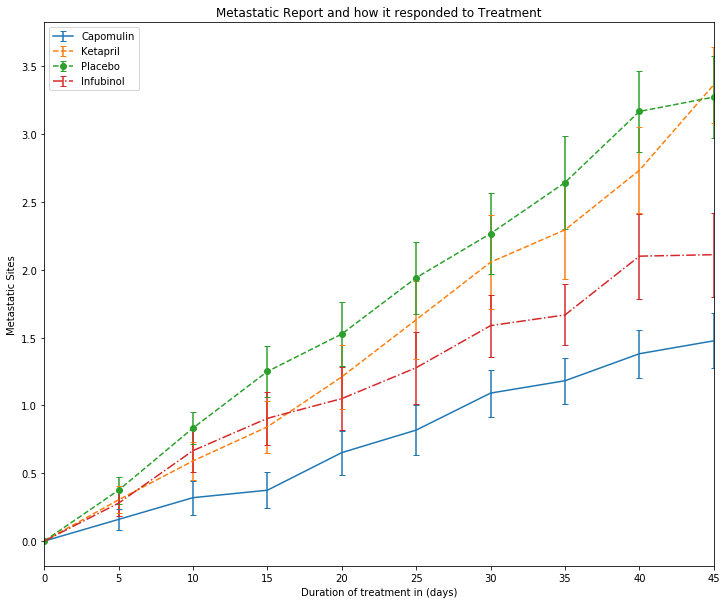

In [21]:
#PLotting the error bar
x= np.arange(0, 50, 5)
fig =plt.figure(figsize = (12,10))
#matplotlib.pyplot.errorbar(x, y, yerr=None, xerr=None, fmt='', ecolor=None, elinewidth=None, capsize=None, barsabove=False, lolims=False, uplims=False, xlolims=False, 
#xuplims=False, errorevery=1, capthick=None, *, data=None, **kwargs
plt.errorbar(x, mean_of_grouped_met_data.loc[["Capomulin", "Metastatic Sites"]],
             yerr = std_met_error.loc[["Capomulin", "Metastatic Sites"]], fmt = '', capsize = 3, label = "Capomulin")
plt.errorbar(x, mean_of_grouped_met_data.loc[["Ketapril", "Metastatic Sites"]],
             yerr = std_met_error.loc[["Ketapril", "Metastatic Sites"]], fmt = '--', capsize = 3, label = "Ketapril")
plt.errorbar(x, mean_of_grouped_met_data.loc[["Placebo", "Metastatic Sites"]],
             yerr = std_met_error.loc[["Placebo", "Metastatic Sites"]], fmt = 'o--', capsize = 3, label = "Placebo")
plt.errorbar(x, mean_of_grouped_met_data.loc[["Infubinol", "Metastatic Sites"]],
             yerr = std_met_error.loc[["Infubinol", "Metastatic Sites"]], fmt = '-.', capsize = 3, label = "Infubinol")

# Adding the legend
plt.legend(loc="upperleft")

# Adding the labels
plt.title('Metastatic Report and how it responded to Treatment')
plt.xlabel('Duration of treatment in (days)')
plt.ylabel('Metastatic Sites')
plt.ylim()
plt.xlim(0,45)
#Saving the figure
plt.savefig('Metastatic Response.png')
plt.show()

## Survival Rates

In [25]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
grouped_data  = merged_data.groupby(["Drug", "Timepoint"])
count_of_mice_data = grouped_data["Mouse ID"].count()

# Convert to DataFrame
mice_df = pd.DataFrame(count_of_mice_data).reset_index()
mice_df.head(6)

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
5,Capomulin,25,22


In [26]:
# Minor Data Munging to Re-Format the Data Frames
reformatted_mice_df =mice_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Mouse ID')

# Preview the Data Frame
reformatted_mice_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


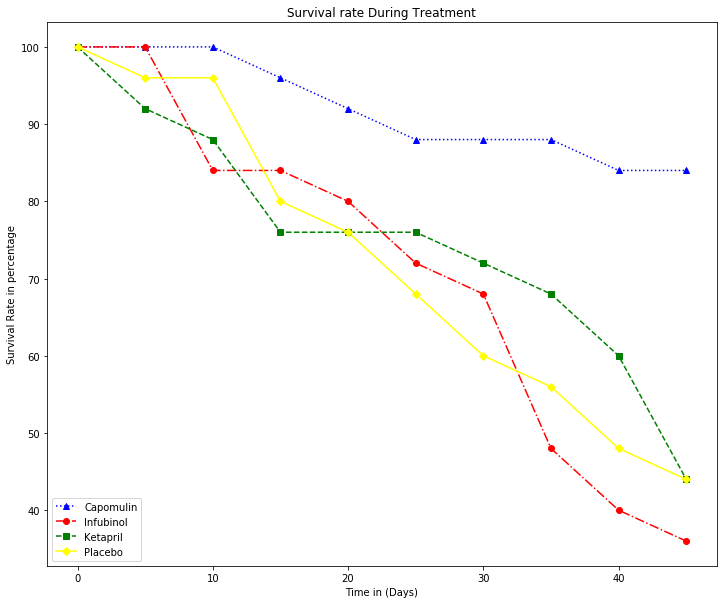

In [57]:
# Generate the Plot (Accounting for percentages)
x= np.arange(0, 50, 5)
fig = plt.figure(figsize=(12,10))
plt.plot(x, (reformatted_mice_df['Capomulin']/25)*100, ls ='dotted', marker='^', color = 'blue', label = 'Capomulin')
plt.plot(x, (reformatted_mice_df['Infubinol']/25)*100, ls ='-.', marker='o', color = 'red', label = 'Infubinol')
plt.plot(x, (reformatted_mice_df['Ketapril']/25)*100, ls= '--', marker='s', color = 'green', label = 'Ketapril')
plt.plot(x, (reformatted_mice_df['Placebo']/25)*100,  ls ='-', marker='D', color = 'yellow', label = 'Placebo')
plt.title('Survival rate During Treatment')
plt.legend(loc = 'lower left')
plt.xlabel('Time in (Days)')
plt.ylabel('Survival Rate in percentage')
plt.ylim()
plt.xlim()
plt.savefig('Survival Rate.png')
plt.show()

# Summary Bar Graph

In [48]:
# Calculate the percent changes for each drug
i= 45
percentage_change =((reformatted_mean_df.loc[45, :] - i)/i)*100


# Display the data to confirm
percentage_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: 45, dtype: float64

In [49]:
# Store all Relevant Percent Changes into a Tuple

def convert(percentage_change): 
    return tuple(percentage_change) 
print(convert(percentage_change))

(-19.475302666666654, 42.51649185811964, 46.123471728395046, 57.02879468484847, 53.92334713675214, 51.297960484848495, 47.24117486349207, -22.320900462222223, 52.085134290909075, 46.57975086507937)


In [50]:
tuple_percent_change = tuple(zip(percentage_change.index, percentage_change))
tuple_percent_change

(('Capomulin', -19.475302666666654),
 ('Ceftamin', 42.51649185811964),
 ('Infubinol', 46.123471728395046),
 ('Ketapril', 57.02879468484847),
 ('Naftisol', 53.92334713675214),
 ('Placebo', 51.297960484848495),
 ('Propriva', 47.24117486349207),
 ('Ramicane', -22.320900462222223),
 ('Stelasyn', 52.085134290909075),
 ('Zoniferol', 46.57975086507937))

In [72]:
# Splice the data between passing and failing drugs
#Creating empty list

p_list = []
f_list = []
passing_list = []
failing_list = []
for j,i in tuple_percent_change :
    if elements > 0 :
        drugs_passed = i
        p_list.append(i)
        passing_list.append(j)
    else :
        drugs_failing = i
        f_list.append(i)
        failing_list.append(j)
Drugs_passing = list(zip(passing_list, p_list))
Drugs_failing = list(zip(failing_list, f_list))     
            
    

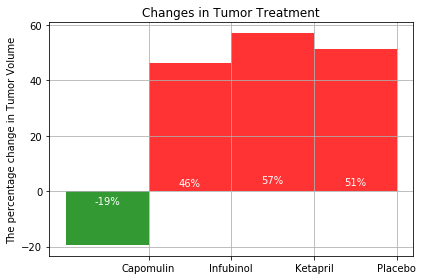

In [73]:
# Orient widths. Add labels, tick marks, etc
fig, ax = plt.subplots()
x1 = [0]
x2 = [1, 2, 3]
y = [percentage_change["Infubinol"], percentage_change["Ketapril"], percentage_change["Placebo"]]
x_axis = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
b1= ax.bar(x1, percentage_change["Capomulin"], color='green', align="edge", alpha = 0.8, width = -1)
b2 = ax.bar(x2, y , color='red', align="edge", alpha= 0.8, width = -1)

plt.setp(ax, xticks=[0, 1, 2, 3], xticklabels=["Capomulin", "Infubinol", "Ketapril", "Placebo"],
        yticks=[-20, 0, 20, 40, 60])
ax.set_title('Changes in Tumor Treatment')
ax.set_ylabel('The percentage change in Tumor Volume')
ax.grid()

#Use functions to label the percentages of changes
def autolabel(rectangles):
    for rect in rectangles:
        h = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, .1*h, "%d" %int(h)+ "%",
                ha='center', va='top', color="white")
        
# Call functions to implement the function call
autolabel(b1)
autolabel(b2)
fig.tight_layout()
plt.savefig('Tumor changes.png')
plt.show()
